In [3]:
import tensorflow as tf 
from tensorflow.keras import datasets , layers ,models
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape 

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
classes = ["airplane" , "automobile","bird","cat","deer","dog","frog" , "horse" , "ship" , "truck"]


In [7]:
def plot_sample(x , y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

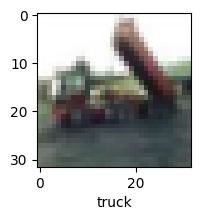

In [8]:
plot_sample(x_train ,y_train,2)

In [9]:
x_train = x_train/255
x_test = x_test/255


In [ ]:
from tensorflow import keras 
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu') ,
    layers.Dense(1000,activation = 'relu') ,
    layers.Dense(10,activation = 'sigmoid')     
])


ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics= ['accuracy']
            )

ann.fit(x_train , y_train , epochs =5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3068 - loss: 1.9323
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4160 - loss: 1.6501
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4576 - loss: 1.5440
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4780 - loss: 1.4841
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4970 - loss: 1.4416


In [16]:
cnn =  models.Sequential([
    layers.Conv2D(filters=32 , kernel_size=(3,3),activation='relu' , input_shape = (32,32,3)) ,
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size=(3,3),activation='relu') ,
    layers.MaxPooling2D((2,2)),




    layers.Flatten(),
    layers.Dense(64,activation = 'relu') ,
    layers.Dense(10,activation = 'softmax')     
])




In [19]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics= ['accuracy']
            )


In [20]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4761 - loss: 1.4562
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6382 - loss: 1.0356
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6869 - loss: 0.8983
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7229 - loss: 0.8036
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7504 - loss: 0.7216
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7695 - loss: 0.6614
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7910 - loss: 0.5956
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8074 - loss: 0.5456
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8291 - loss: 0.4917
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8439 - loss: 0.4452


In [21]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6916 - loss: 1.0284


[1.0384200811386108, 0.6915000081062317]

In [26]:
y_test = y_test.reshape(-1,)

y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4.1871588e-04, 4.0582863e-06, 6.5480138e-04, 4.6074852e-01,
        1.6967343e-03, 1.2512086e-02, 3.2154787e-01, 5.7065654e-06,
        2.0235176e-01, 5.9697715e-05],
       [2.1111488e-04, 3.0645686e-01, 4.1285966e-07, 8.7871923e-09,
        1.4395513e-09, 1.5623433e-10, 5.1182361e-09, 9.1462567e-11,
        6.9310927e-01, 2.2235322e-04],
       [8.1717610e-02, 2.1341005e-01, 1.7574836e-02, 1.0813320e-02,
        5.3509036e-03, 1.2884816e-02, 2.3775911e-03, 1.2869976e-03,
        5.9152400e-01, 6.3059926e-02],
       [7.0886803e-01, 1.5700094e-02, 4.1572150e-02, 7.1236253e-04,
        2.1307026e-01, 6.8877298e-06, 4.1929943e-06, 9.5255109e-06,
        2.0000288e-02, 5.6236040e-05],
       [2.4294113e-07, 3.0763488e-07, 1.2045244e-03, 3.7992429e-02,
        1.3623334e-01, 9.7755669e-04, 8.2358080e-01, 1.3523509e-06,
        9.2924065e-06, 9.9536670e-08]], dtype=float32)

In [32]:
y_classes  = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [34]:
classes[y_classes[0]]



'cat'

In [36]:
from sklearn.metrics import classification_report
print("Classification report : \n ", classification_report(y_test,y_classes))

Classification report : 
                precision    recall  f1-score   support

           0       0.79      0.69      0.73      1000
           1       0.79      0.84      0.82      1000
           2       0.53      0.65      0.59      1000
           3       0.54      0.45      0.49      1000
           4       0.62      0.68      0.65      1000
           5       0.57      0.60      0.58      1000
           6       0.72      0.81      0.77      1000
           7       0.80      0.67      0.73      1000
           8       0.79      0.81      0.80      1000
           9       0.83      0.71      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

